Kaggle needs kaggle.json file to be in the root directory to download a dataset to colab. To generate that json head to your account page and Account tab on that page: https://www.kaggle.com/settings/account. Then, click "Create New Token" button to download your own kaggle.json file. This is specific for user account. 
Upload the json file to the runtime and run below cell to move the file to the required folder.

Run below cell if first call was not successful. Load kaggle.json to runtime before runnning again.

In [ ]:
# Either run shell script or below cell. The contents are same
!bash ./download_rpc.sh

In [21]:
# Run below cell if shell script does not work
!cp kaggle.json /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d diyer22/retail-product-checkout-dataset
!unzip -q 'retail-product-checkout-dataset.zip'

In [1]:
from RPCDataset import RPCDataset

In [2]:
# The parent directory is the path of the folder that named as "retail_product_checkout"
# The script also downloads some json files in the same directory as itself
# However this jsons are not important, the main directory is the folder
dataset_parent_dir = "retail_product_checkout"
# Split can be either train, val or test
dataset = RPCDataset(dataset_parent_dir, "val")

In [3]:
n_imgs = dataset.get_num_imgs()
print("Number of images: ", n_imgs)

Number of images:  6000


In [4]:
import random
rand_ind = random.randint(0, n_imgs)

To get an image use get_img_path_by_id function that accepts an integer for the index of the image in the dataset. This value should be in between [0,n_images)

In [5]:
dataset.get_img_path_by_id(rand_ind)

'retail_product_checkout/val2019/20181022-10-16-38-3011.jpg'

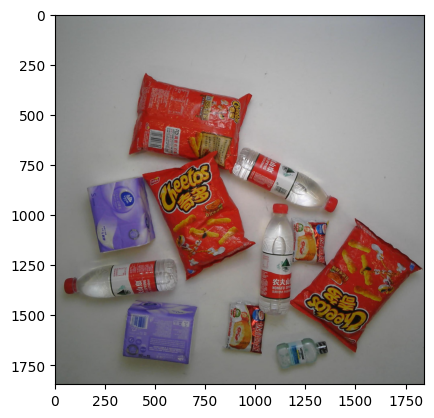

In [7]:
import matplotlib.pyplot as plt
import cv2 
rand_img = dataset.get_img_by_id(rand_ind)

plt.figure()
plt.imshow(rand_img)
plt.show()

For reading bounding box annotations, use get_annots_by_img_id which takes the index of the image and key to select a naming for the class that bounding box belongs to. 

The key values can be:


*   sku_name: For English class name
*   sku_class: For English base class name
*   name: For Chinese class name
*   class: For Chinese base class name

the default value for this parameter is "sku_name"


The bounding boxes are in the form of [x, y, width, height] all in floats, where x and y are the top-left coordinate of the box

In [8]:
annots = dataset.get_annots_by_img_id(rand_ind)
for bbox, class_name in annots:
  print("Bbox: ", bbox, " belongs to class: ", class_name)

annots = dataset.get_annots_by_img_id(rand_ind, "sku_class")
for bbox, class_name in annots:
  print("Bbox: ", bbox, " belongs to class: ", class_name)

Bbox:  [350.89, 284.72, 638.82, 520.26]  belongs to class:  10_puffed_food
Bbox:  [150.92, 794.37, 357.46, 407.01]  belongs to class:  188_tissue
Bbox:  [428.75, 674.03, 582.2, 668.91]  belongs to class:  10_puffed_food
Bbox:  [869.38, 651.03, 548.57, 352.15]  belongs to class:  71_drink
Bbox:  [35.9, 1210.22, 585.74, 214.12]  belongs to class:  71_drink
Bbox:  [1005.64, 934.17, 191.12, 582.2]  belongs to class:  71_drink
Bbox:  [333.19, 1417.26, 392.85, 348.61]  belongs to class:  188_tissue
Bbox:  [832.22, 1419.03, 224.74, 279.6]  belongs to class:  69_dessert
Bbox:  [1094.97, 1604.44, 278.22, 170.31]  belongs to class:  164_personal_hygiene
Bbox:  [1171.17, 1008.13, 206.32, 256.06]  belongs to class:  69_dessert
Bbox:  [1167.49, 1011.81, 666.85, 690.8]  belongs to class:  10_puffed_food
Bbox:  [350.89, 284.72, 638.82, 520.26]  belongs to class:  puffed_food
Bbox:  [150.92, 794.37, 357.46, 407.01]  belongs to class:  tissue
Bbox:  [428.75, 674.03, 582.2, 668.91]  belongs to class:  p

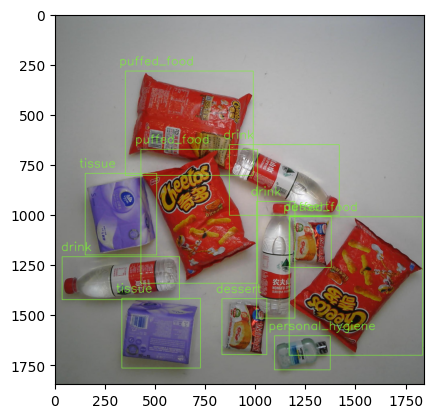

In [9]:
def vis_bbox_on_img(img, bbox, text):
  font = cv2.FONT_HERSHEY_SIMPLEX
  fontScale = 2
  thickness = 2

  x,y,w,h = [int(i) for i in bbox]
  paint_img = img.copy()
  
  text_x = max(30, x-30)
  text_y = max(30, y-30)

  cv2.rectangle(paint_img, (x, y), (x+w, y+h), (124, 241, 54), thickness)
  cv2.putText(paint_img, text, (text_x, text_y), font, fontScale, (124, 241, 54), thickness, cv2.LINE_AA)
  return paint_img

vised_img = rand_img.copy()
for annot in annots:
  vised_img = vis_bbox_on_img(vised_img, annot[0], annot[1])  


plt.figure()
plt.imshow(vised_img)
plt.show()  

Finally, you can read an element from dataset with an id with the get_element_by_id function. This function accepts an index of the element and return below structure as dictionary:

{
  "img": np array of the image,

  "annots": bounding box annotations of the image with the same structure as get_annots_by_img_id function returns,

  "width": Width of the image. Obtained from dataset annotations,
  
  "height": Height of the image. Obtained from dataset annotations

}

In [10]:
element = dataset.get_element_by_id(rand_ind)
print("Shape of the image: ", element["img"].shape)
print("Annotations:", element["annots"])
print()
print("W: {} H: {}".format(element["width"], element["height"]))

Shape of the image:  (1845, 1845, 3)
Annotations: [([350.89, 284.72, 638.82, 520.26], '10_puffed_food'), ([150.92, 794.37, 357.46, 407.01], '188_tissue'), ([428.75, 674.03, 582.2, 668.91], '10_puffed_food'), ([869.38, 651.03, 548.57, 352.15], '71_drink'), ([35.9, 1210.22, 585.74, 214.12], '71_drink'), ([1005.64, 934.17, 191.12, 582.2], '71_drink'), ([333.19, 1417.26, 392.85, 348.61], '188_tissue'), ([832.22, 1419.03, 224.74, 279.6], '69_dessert'), ([1094.97, 1604.44, 278.22, 170.31], '164_personal_hygiene'), ([1171.17, 1008.13, 206.32, 256.06], '69_dessert'), ([1167.49, 1011.81, 666.85, 690.8], '10_puffed_food')]

W: 1845 H: 1845
